# Samuel Gartenstein QMSS GR5073 Homework 4

## Part 1: Build a classification model using text data

In part one of the homework, you will solve a text classification task.

The training data is also stored in the HW 4 data folder.   You can import it and train test split it to generate your data for this assignment.

The data consists of headlines that signify clickbait or not.  Training and test data are stored in the following objects: X_train, X_test, y_train_labels, y_test_labels.  The remaining objects can be ignored.

In a real application this might allow us to find out what is hard news information (or perhaps to choose among headlines that are more likely to be clicked).

Use cross-validation to evaluate the results. Use a robust metric for classification  (AUC or F1-Score for example), and inspect all models by visualizing the coefficients. (See helper function in our in class notebook for text models.)

To complete part one of the homework do the following:

Import the text data, vectorize the clickbait headline column into an X matrix.  Then run logistic regression at least three times and select a single best model.  Note that you should create three logistic regression models with different different tokenization approaches.  You should not change your modeling approach, you should simply experiment with different tokenizers. Be sure to explain your choices and evaluate your models using cross validation and using test set data.



In [ ]:
#Loading Necessary Libraries and Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Data Splitting
from sklearn.model_selection import train_test_split

#Evaluation Metrics
from sklearn.metrics import accuracy_score, classification_report

#NLP Packages
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Supervised Machine Learning Packages
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

#Keras Packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint

#Ignoring Warnings
import warnings
warnings.filterwarnings("ignore")


In [ ]:
#Loading the feature data
#Loading the corresponding labels
X = pd.read_csv("/content/X_train(1)(1).csv", squeeze=True)
y_labels = pd.read_csv("/content/y_train(1)(1).csv", squeeze=True)

In [ ]:
print(X.head(), "\n")
print(X.shape)

0       MyBook Disk Drive Handles Lots of Easy Backups
1                       CIT Posts Eighth Loss in a Row
2    Candy Carson Singing The "National Anthem" Is ...
3    Why You Need To Stop What You're Doing And Dat...
4    27 Times Adele Proved She's Actually The Reale...
Name: headline, dtype: object 

(24979,)


In [ ]:
print(y_labels.head(), "\n")
print(y_labels.shape)


0    not clickbait
1    not clickbait
2        clickbait
3        clickbait
4        clickbait
Name: label, dtype: object 

(24979,)


In [ ]:
y = pd.get_dummies(y_labels)
y = y.drop(columns=['not clickbait'])
y.head()

,clickbait
0,0
1,0
2,1
3,1
4,1


In [ ]:
#Splitting the data into training and test sets with an 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.2, random_state=42)

In [ ]:
# Checking the class frequency in y_train and y_test to ensure the target data is balance

ytrain_class_counts = np.unique(y_train, return_counts=True)
ytest_class_counts = np.unique(y_test, return_counts=True)

print("Training Set Class Distribution:")
print(dict(zip(ytrain_class_counts[0], ytrain_class_counts[1])))

print("\nTest Set Class Distribution:")
print(dict(zip(ytest_class_counts[0], ytest_class_counts[1])))


Training Set Class Distribution:
{0: 10168, 1: 9815}

Test Set Class Distribution:
{0: 2610, 1: 2386}


For both the y training and test data, the distribution of the labels is relatively balanced. For the y training data, $50.88\%$ of the labels are "not clickbait" and $49.12\%$ are "clickbait." For the y test data, $52.24\%$ of the labels are "not click bait" and $47.76\%$ are "clickbait."

----

## Feature Transformation

Below, I transform the raw text data into three different feature vectors.

In [ ]:
#Utilizing CountVectorizer to convert raw text data (for X_test and X_train) into a sparse matrices of token counts

countVect = CountVectorizer()

X_train_count = countVect.fit_transform(X_train)
X_test_count = countVect.transform(X_test)

print(X_train_count.shape)
print(X_test_count.shape)


(19983, 18357)
(4996, 18357)


In [ ]:
feature_names = countVect.get_feature_names_out()

print("First 50 features:\n{}".format(feature_names[:50]), "\n")
print("Every 100th feature:\n{}".format(feature_names[::100]))

First 50 features:
['00' '000' '00s' '01' '04' '05' '08' '09' '10' '100' '1000'
 '1000blackgirls' '100k' '100m' '100th' '100ºf' '101' '101st' '102' '103'
 '104' '106' '108' '109' '10m' '10th' '11' '110' '111' '113' '114' '115'
 '116' '11k' '11n' '11th' '12' '120' '1200' '121' '1215' '124' '126' '127'
 '128' '12th' '13' '130' '132' '134'] 

Every 100th feature:
['00' '1980' '33' '73' 'abortion' 'activated' 'advocacy' 'aircraft'
 'allergies' 'analyst' 'anthony' 'aquino' 'arvind' 'atlantis' 'avatar'
 'bacterial' 'bans' 'baxter' 'bei' 'bettis' 'bitmover' 'blowingly' 'boon'
 'braless' 'brit' 'build' 'butt' 'cameron' 'cardio' 'cation' 'challenge'
 'cheering' 'choreography' 'classes' 'coaches' 'combative' 'complicate'
 'connect' 'controllers' 'cost' 'crawl' 'crow' 'cvs' 'dashes'
 'decommissioned' 'deliciously' 'derek' 'dial' 'disappoints' 'dissolving'
 'dominate' 'dramatize' 'duff' 'eastwood' 'election' 'empire' 'entrance'
 'euphemisms' 'exhausted' 'extreme' 'fandom' 'feelin' 'fiji' 'flag' 'f

In [ ]:
'''
Utilizing TfidfVectorizer to convert raw text data (for X_test and X_train)
into a sparse matrices of token counts weighted by term frequency-inverse document frequency
'''

TfidfVect = TfidfVectorizer()

X_train_Tfidf = TfidfVect.fit_transform(X_train)
X_test_Tfidf = TfidfVect.transform(X_test)

print(X_train_Tfidf.shape)
print(X_test_Tfidf.shape, "\n")

(19983, 18357)
(4996, 18357) 



In [ ]:
feature_names = TfidfVect.get_feature_names_out()

print("First 50 features:\n{}".format(feature_names[:50]), "\n")
print("Every 100th feature:\n{}".format(feature_names[::100]))

First 50 features:
['00' '000' '00s' '01' '04' '05' '08' '09' '10' '100' '1000'
 '1000blackgirls' '100k' '100m' '100th' '100ºf' '101' '101st' '102' '103'
 '104' '106' '108' '109' '10m' '10th' '11' '110' '111' '113' '114' '115'
 '116' '11k' '11n' '11th' '12' '120' '1200' '121' '1215' '124' '126' '127'
 '128' '12th' '13' '130' '132' '134'] 

Every 100th feature:
['00' '1980' '33' '73' 'abortion' 'activated' 'advocacy' 'aircraft'
 'allergies' 'analyst' 'anthony' 'aquino' 'arvind' 'atlantis' 'avatar'
 'bacterial' 'bans' 'baxter' 'bei' 'bettis' 'bitmover' 'blowingly' 'boon'
 'braless' 'brit' 'build' 'butt' 'cameron' 'cardio' 'cation' 'challenge'
 'cheering' 'choreography' 'classes' 'coaches' 'combative' 'complicate'
 'connect' 'controllers' 'cost' 'crawl' 'crow' 'cvs' 'dashes'
 'decommissioned' 'deliciously' 'derek' 'dial' 'disappoints' 'dissolving'
 'dominate' 'dramatize' 'duff' 'eastwood' 'election' 'empire' 'entrance'
 'euphemisms' 'exhausted' 'extreme' 'fandom' 'feelin' 'fiji' 'flag' 'f

In [ ]:
#Displaying information about scikit-learn's English stop words

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

#Number of stop words
print("Number of stop words: {}".format(len(ENGLISH_STOP_WORDS)), "\n")

#First 30 stop words
print("First 30 stopwords:\n{}".format(list(ENGLISH_STOP_WORDS)[:30]))

Number of stop words: 318 

First 30 stopwords:
['put', 'our', 'will', 'hundred', 'both', 'serious', 'within', 'am', 'without', 'or', 'seemed', 'although', 'whether', 'myself', 'once', 'elsewhere', 'describe', 'fifteen', 'go', 'take', 'he', 'fill', 'must', 'behind', 'eleven', 'amount', 'fifty', 'give', 'latter', 'thin']


In [ ]:
'''
Utilizing TfidfVectorizer to convert raw text data (for X_test and X_train)
into a sparse matrices of token counts weighted by term frequency-inverse document frequency

stop_words='english': Excludes common English stop words.
max_features is set to 5000 in order to limit to vocab and reduce dimension size
'''

TfidfVectStop = TfidfVectorizer(stop_words='english', max_features=5000)

X_train_Stop = TfidfVectStop.fit_transform(X_train)
X_test_Stop = TfidfVectStop.transform(X_test)

print(X_train_Stop.shape)
print(X_test_Stop.shape, "\n")


(19983, 5000)
(4996, 5000) 



In [ ]:
feature_names = TfidfVectStop.get_feature_names_out()

print("First 50 features:\n{}".format(feature_names[:50]), "\n")
print("Every 50th feature:\n{}".format(feature_names[::50]))

First 50 features:
['000' '00s' '08' '09' '10' '100' '11' '12' '13' '14' '140' '15' '16' '17'
 '18' '19' '1989' '20' '200' '2000s' '2004' '2005' '2006' '2007' '2008'
 '2009' '2010' '2011' '2012' '2013' '2014' '2015' '2016' '21' '22' '23'
 '24' '25' '250' '26' '27' '28' '29' '2nd' '30' '300' '31' '32' '33' '34'] 

Every 50th feature:
['000' '35' '85' 'actors' 'ago' 'ambassador' 'apple' 'ass' 'awakens'
 'basic' 'bieber' 'bodies' 'brave' 'bullying' 'cancels' 'cease' 'chase'
 'clark' 'collision' 'concern' 'cooper' 'crew' 'dads' 'declares'
 'designer' 'discover' 'double' 'duke' 'eggs' 'energy' 'events' 'extra'
 'faris' 'fewer' 'firms' 'forget' 'funny' 'ghraib' 'good' 'grounds'
 'hamilton' 'hearing' 'hillary' 'horrifying' 'hysterical' 'increase'
 'insurgents' 'israel' 'jobs' 'karzai' 'known' 'latino' 'leg' 'lincoln'
 'look' 'magical' 'maryland' 'melbourne' 'million' 'mongolia' 'murdering'
 'necklaces' 'noodles' 'offices' 'ousted' 'parks' 'perry' 'places' 'pool'
 'pressure' 'propose' 'quick' 

## Models

Below I will execute three penalized logistic regression models, each employing one of the tokenization approaches above. I will evaluate the best training model using GridSearch cross-validation, assess how well that model predicts to the test data, and measure the predictive strength of the model.

In [ ]:
'''
Creating function that visualizes top and negative coefficents for the corresponding features in the vectorized text data
Function will be called for each the logistic regression model with the different tokenization approach
'''

def visualize_coefficients(coefficients, feature_names, n_top_features=25):

  coefficients = coefficients.squeeze()

  coefficients = coefficients.ravel()

  top_positive = np.argsort(coefficients)[-n_top_features:]
  top_negative = np.argsort(coefficients)[:n_top_features]

  top_features = np.hstack([top_negative, top_positive])

  coef = coefficients[top_features]
  feature_names_selected = [feature_names[i] for i in top_features]

  plt.figure(figsize=(10, 6))
  colors = ['#ff2020' if c < 0 else '#0000aa' for c in coef]
  plt.barh(np.arange(1, 1 + 2 * n_top_features), coef, color=colors)
  plt.yticks(np.arange(1, 1 + 2 * n_top_features), feature_names_selected, ha="right")
  plt.xlabel("Coefficient Magnitude")
  plt.title("Top {} Positive and Negative Coefficients".format(n_top_features ))
  plt.show()



## Model 1

In [ ]:
'''
Logistic Regression with X training and test matrices created using CountVectorizer
'''

logreg = LogisticRegression(max_iter=10000, penalty='l2')
logreg.fit(X_train_count, y_train)

hyperparameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

gridsearch_1 = GridSearchCV(logreg, param_grid=hyperparameters, cv=10, scoring='roc_auc', error_score='raise')
gridsearch_1.fit(X_train_count, y_train)

gridsearch_1_score = gridsearch_1.best_score_
gridsearch_1_bestparams = gridsearch_1.best_params_

print("Best mean cross-validation score: ", round(gridsearch_1_score,4))
print("Parameter that optimizes the mean cv score: ",gridsearch_1_bestparams)


Best mean cross-validation score:  0.996
Parameter that optimizes the mean cv score:  {'C': 10}


In [ ]:
#Best model (C=10) from the Gridsearch CV
bestmodel_1 = gridsearch_1.best_estimator_
bestmodel_1

#Predicted probabilites of clickbait from best training model
y_pred_prob = bestmodel_1.predict_proba(X_test_count)[:, 1]
y_test_score = roc_auc_score(y_test, y_pred_prob)

print("Test score with ROC AUC:",round(y_test_score,4))



Test score with ROC AUC: 0.9945


In [ ]:
#Predicted values (clickbait or not clickbait) from best training model
y_pred = bestmodel_1.predict(X_test_count)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy score:", round(accuracy,4), "\n")
print("Classifiation Report \n", classification_rep)

Accuracy score: 0.9692 

Classifiation Report 
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      2610
           1       0.97      0.96      0.97      2386

    accuracy                           0.97      4996
   macro avg       0.97      0.97      0.97      4996
weighted avg       0.97      0.97      0.97      4996



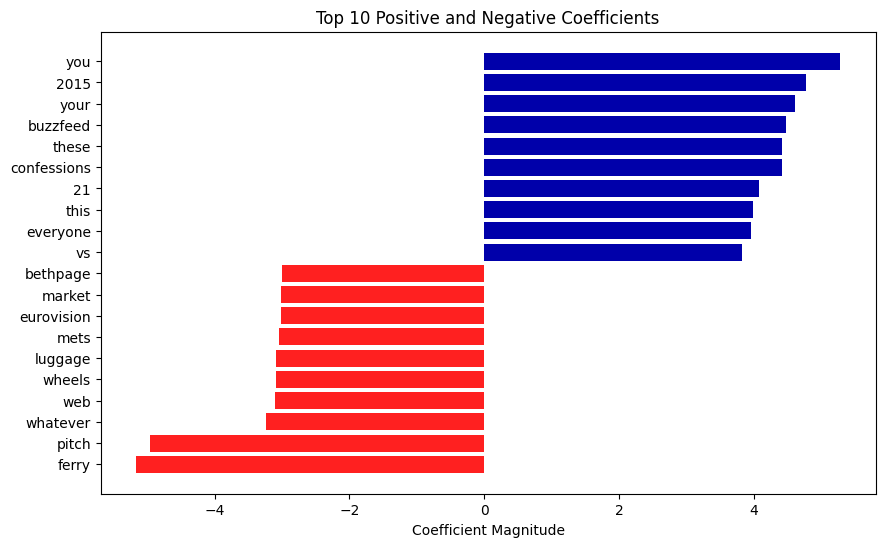

In [ ]:
#Visualizing the top positive and negative coefficents for Model 1

feature_names = countVect.get_feature_names_out()

coefs = bestmodel_1.coef_
visualize_coefficients(coefs, feature_names, n_top_features=10)

In [ ]:
#Retreiving the magnitudes of the top positive and negative feature

coefs = bestmodel_1.coef_[0]

# Find the index of the largest and smallest coefficients
index_of_largest = coefs.argmax()
index_of_smallest = coefs.argmin()

largest_feature, largest_coefficient = feature_names[index_of_largest], coefs[index_of_largest]
smallest_feature, smallest_coefficient = feature_names[index_of_smallest], coefs[index_of_smallest]


print("Largest Coefficient:")
print("Feature:", largest_feature)
print("Coefficient:", largest_coefficient)

print("\nSmallest Coefficient:")
print("Feature:", smallest_feature)
print("Coefficient:", smallest_coefficient)


Largest Coefficient:
Feature: you
Coefficient: 5.284275078848929

Smallest Coefficient:
Feature: ferry
Coefficient: -5.169210895822887


### Model 1 Analysis

The model with the best mean cross-validation score ($\bar{cv}=0.996$) is when the tuning parameter $C=10$.

The test score from the best model, also using ROC AUC, is $0.9945$.

Furthermore, accuracy score is $0.9692$ and the F1 score is $0.97$.

The graph above displays the top 10 negative and positive features, according to the best model. The words "you" and "ferry" have the largest positive and negative coefficents respectively.

The presence of the word "you" causes the largest increase on the log-odds that a headline is click bait, with an increment of $5.28$, holding all else constant. Conversely, the presence of the word "ferry" causes the largest decrease on the log-odds that a headline is click bait, with an increment of $5.17$, holding all else constant.



## Model 2

In [ ]:
'''
Logistic Regression with X training and test matrices created using TfidfVectorizer
'''

logreg.fit(X_train_Tfidf, y_train)

#Gridsearch CV to find the optimal mean-crossivalidation score with the TfidfVectorizer

hyperparameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

gridsearch_2 = GridSearchCV(logreg, param_grid=hyperparameters, cv=10, scoring='roc_auc', error_score='raise')
gridsearch_2.fit(X_train_Tfidf, y_train)

gridsearch_2_score = gridsearch_2.best_score_
gridsearch_2_bestparams = gridsearch_2.best_params_

#Displaying best mean cv score and best parameter
print("Best mean cross-validation score: ", round(gridsearch_2_score,4))
print("Parameter that optimizes the mean cv score: ",gridsearch_2_bestparams)


Best mean cross-validation score:  0.9965
Parameter that optimizes the mean cv score:  {'C': 100}


In [ ]:
#Best model (C=100) from the Gridsearch CV
bestmodel_2 = gridsearch_2.best_estimator_
bestmodel_2

#Predicted probabilites of clickbait from best training model
y_pred_prob = bestmodel_2.predict_proba(X_test_count)[:, 1]
y_test_score = roc_auc_score(y_test, y_pred_prob)

print("Test score with ROC AUC:",round(y_test_score,4))


Test score with ROC AUC: 0.9925


In [ ]:
#Predicted values (clickbait or not clickbait) from best training model
y_pred = bestmodel_2.predict(X_test_Tfidf)

#Accuracy Score and Classification Report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy score:", round(accuracy,4), "\n")
print("Classifiation Report \n", classification_rep)

Accuracy score: 0.9698 

Classifiation Report 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      2610
           1       0.97      0.97      0.97      2386

    accuracy                           0.97      4996
   macro avg       0.97      0.97      0.97      4996
weighted avg       0.97      0.97      0.97      4996



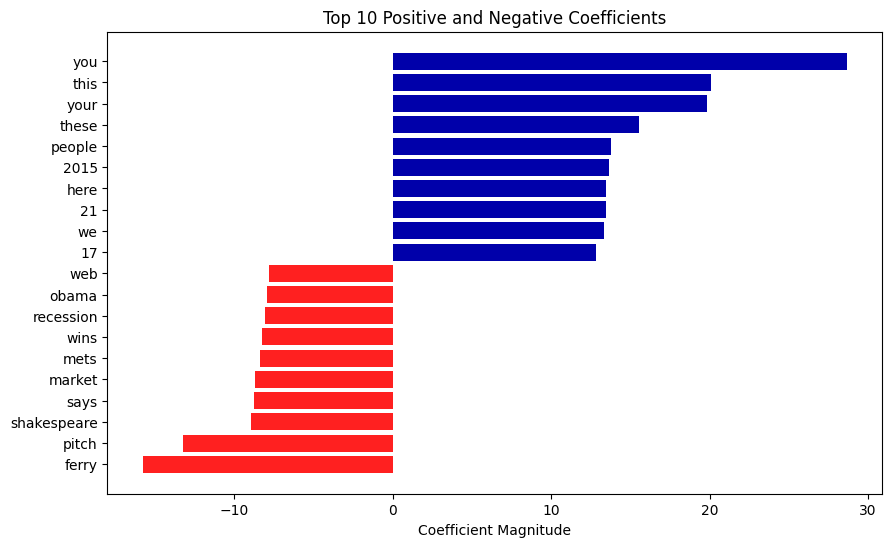

In [ ]:
#Visualizing the top positive and negative coefficents for Model 2

coefs = bestmodel_2.coef_
feature_names = TfidfVect.get_feature_names_out()


visualize_coefficients(coefs, feature_names, n_top_features=10)

In [ ]:
#Retreiving the top magnitudes of the top positive and negative feature
#Plotting the top positive and negative coefficents for model 2

coefs = bestmodel_2.coef_[0]

# Find the index of the largest and smallest coefficients
index_of_largest = coefs.argmax()
index_of_smallest = coefs.argmin()

largest_feature, largest_coefficient = feature_names[index_of_largest], coefs[index_of_largest]
smallest_feature, smallest_coefficient = feature_names[index_of_smallest], coefs[index_of_smallest]


print("Largest Coefficient:")
print("Feature:", largest_feature)
print("Coefficient:", largest_coefficient)

print("\nSmallest Coefficient:")
print("Feature:", smallest_feature)
print("Coefficient:", smallest_coefficient)


Largest Coefficient:
Feature: you
Coefficient: 28.692797249902558

Smallest Coefficient:
Feature: ferry
Coefficient: -15.769801887813443


### Model 2 Analysis

The model with the best mean cross-validation score ($\bar{cv}=0.9965 $) is when the tuning parameter  𝐶=10 .

The test score from the best model, also measured using ROC AUC, is  $0.9925$ .

The accuracy score is $0.9698$ and the F1 score is $0.97$.

Similar to Model 1, the presence of the word "you" causes the largest increase on the log-odds that a headline is click bait, with an increment of  $28.69$, holding all other features constant. Conversely, the presence of the word "ferry" causes the largest decrease on the log-odds that a headline is click bait, with an increment of  $15.77$, holding all other features constant.


## Model 3

In [ ]:
'''
Logistic Regression with X training and test matrices created using TfidfVectorizer, removing common
English words and limiting the vocabulary 5,000 words
'''

logreg.fit(X_train_Stop, y_train)

#Gridsearch CV to find the optimal mean-crossivalidation score with the TfidfVectorizer with Stop

hyperparameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

gridsearch_3 = GridSearchCV(logreg, param_grid=hyperparameters, cv=10, scoring='roc_auc', error_score='raise')
gridsearch_3.fit(X_train_Stop, y_train)

gridsearch_3_score = gridsearch_3.best_score_
gridsearch_3_bestparams = gridsearch_3.best_params_

#Displaying best mean cv score and best parameter
print("Best mean cross-validation score: ", round(gridsearch_3_score,4))
print("Parameter that optimizes the mean cv score: ",gridsearch_3_bestparams)


Best mean cross-validation score:  0.9899
Parameter that optimizes the mean cv score:  {'C': 10}


In [ ]:
#Best model (C=10) from the Gridsearch CV
bestmodel_3 = gridsearch_3.best_estimator_
bestmodel_3

#Predicted probabilites of clickbait from best training model
y_pred_prob = bestmodel_3.predict_proba(X_test_Stop)[:, 1]
y_test_score = roc_auc_score(y_test, y_pred_prob)

print("Test score with ROC AUC:",round(y_test_score,4))


Test score with ROC AUC: 0.9876


In [ ]:
#Predicted values (clickbait or not clickbait) from best training model
y_pred = bestmodel_3.predict(X_test_Stop)

#Accuracy Score and Classification Report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy score:", round(accuracy,4), "\n")
print("Classifiation Report \n", classification_rep)

Accuracy score: 0.9482 

Classifiation Report 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      2610
           1       0.95      0.94      0.95      2386

    accuracy                           0.95      4996
   macro avg       0.95      0.95      0.95      4996
weighted avg       0.95      0.95      0.95      4996



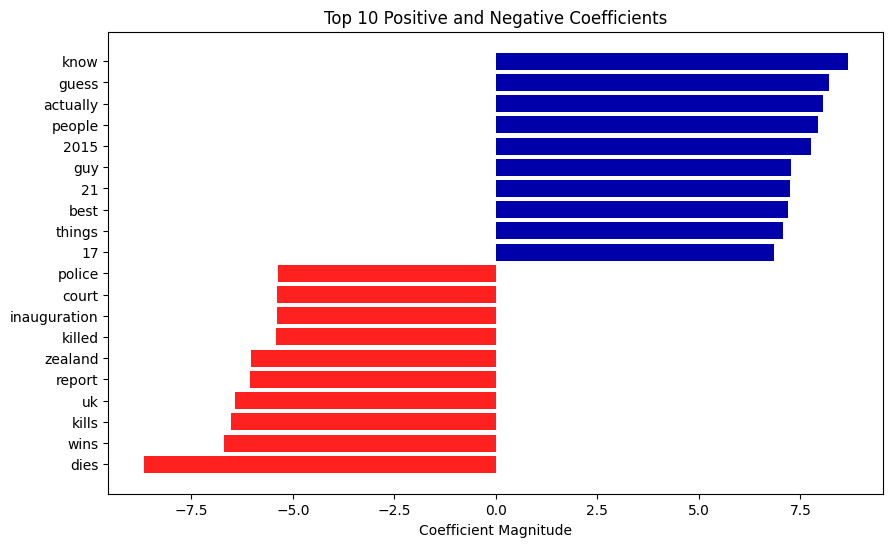

In [ ]:
#Visualizing the top positive and negative coefficents for Model 3

coefs = bestmodel_3.coef_
feature_names = TfidfVectStop.get_feature_names_out()


visualize_coefficients(coefs, feature_names, n_top_features=10)

In [ ]:
#Retreiving the top magnitudes of the top positive and negative feature

coefs = bestmodel_3.coef_[0]

# Finding the index of the largest and smallest coefficients
index_of_largest = coefs.argmax()
index_of_smallest = coefs.argmin()

largest_feature, largest_coefficient = feature_names[index_of_largest], coefs[index_of_largest]
smallest_feature, smallest_coefficient = feature_names[index_of_smallest], coefs[index_of_smallest]


print("Largest Coefficient:")
print("Feature:", largest_feature)
print("Coefficient:", largest_coefficient)

print("\nSmallest Coefficient:")
print("Feature:", smallest_feature)
print("Coefficient:", smallest_coefficient)


Largest Coefficient:
Feature: know
Coefficient: 8.677461589481021

Smallest Coefficient:
Feature: dies
Coefficient: -8.679361953120305


### Model 3 Analysis

The model with the best mean cross-validation score ($\bar{cv}=0.9899 $) is when the tuning parameter  𝐶=10 .
The test score from the best model, also measured using ROC AUC, is  $0.9482$ .

The accuracy score is $0.9698$ and the F1 score is $0.95$.

For Model 3, the presence of the word "know" causes the largest increase on the log-odds that a headline is click bait, with an increment of  $8.68$, holding all other features constant. Conversely, the presence of the word "dies" causes the largest decrease on the log-odds that a headline is click bait, with an increment of $8.68$, holding all other features constant.

## Final Verdict

Although Models 1 and 2 have an $F1$ score of $0.97$, Model 2 has an accuracy score of $96.98\%$, whereas Model 1 has a score of $96.92\% $. As a result, I will choose Model 2, which utilizes the tfid tokenization method, to predict which words are the most likely to make headlines clickbait.

----

#Part 2: Build a predictive neural network using Keras

To complete part two of the homework do the following:

Train test split the iris dataset and then run a multilayer perceptron (feed forward neural network) with two hidden layers on the iris dataset using the keras Sequential interface.

Data can be imported via the following link:

http://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv

fit two models with different numbers of hidden layers and or hidden neurons and evaluate each on a test-set.  Describe the differences in the predictive accuracy of models with different numbers of hidden units/neurons.  Describe the predictive strength of your best model.  Be sure to explain your choice and evaluate this model using the test set.



In [ ]:
#Loading Iris Flower dataset
iris_df = pd.read_csv("http://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv")
iris_df.head(10)

,rownames,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
5,6,5.4,3.9,1.7,0.4,setosa
6,7,4.6,3.4,1.4,0.3,setosa
7,8,5.0,3.4,1.5,0.2,setosa
8,9,4.4,2.9,1.4,0.2,setosa
9,10,4.9,3.1,1.5,0.1,setosa


In [ ]:
iris_df = iris_df.iloc[:,1:]
iris_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
y = iris_df['Species']
X = iris_df.loc[:, iris_df.columns != 'Species']


In [ ]:
y = pd.get_dummies(y)
y.head(10)

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0


In [ ]:
#Splitting the data into training and test sets with an 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Method

Because neural networks is an inherently random process, I ran the each model ten times. For each run, I saved the model with the best validation accuracy. Afterward, I found the test score for each model, and calculated their average accuracy scores. This approach allows me to better compare the predictive strength of each model.


In [ ]:
#Dataframe for loss and accuracy scores
model_1_df = pd.DataFrame(columns=['Loss', 'Accuracy'])


# Function to create a neural network model with two hidden layers

def create_model_1():
  model_1 = Sequential([
    Dense(32, input_shape=(4,)),
    Activation('relu'),
    Dense(32),
    Activation('relu'),
    Dense(3),
    Activation('softmax'),
])
  sgd = SGD(learning_rate=0.0001)
  model_1.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
  return model_1

#Saving the model with the highest validation accuracy
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True)

'''
Iteratively train and evaluate the model:
- Create the model using create_model_1 function
- Fit the model with predefined parameters, including a checkpoint to save the best model
- Evaluate the test score using the best training model (highest validation score)
- Append the loss and accuracy scores to the predefined dataframe
'''

for i in range(10):
  model_1 = create_model_1()
  model_1.fit(X_train, y_train, epochs=20, batch_size=128, verbose=0, validation_split=0.2, callbacks=[checkpoint])
  score = model_1.evaluate(X_test, y_test, batch_size=128)

  model_1_df = model_1_df.append({'Loss': score[0], 'Accuracy': score[1]}, ignore_index=True)

model_1_df

1/1 [==============================] - 0s 29ms/step - loss: 1.2572 - accuracy: 0.3000


,Loss,Accuracy
0,1.315184,0.333333
1,1.468459,0.333333
2,1.425750,0.366667
3,1.362055,0.366667
4,2.374409,0.300000
5,1.253136,0.300000
6,1.412572,0.366667
7,1.819916,0.333333
8,2.007184,0.300000
9,1.257226,0.300000


In [ ]:
'''
Same process as Model 1, but Model 2 has 3 hidden layers
'''

model_2_df = pd.DataFrame(columns=['Loss', 'Accuracy'])


def create_model_2():
  model_2 = Sequential([
    Dense(32, input_shape=(4,)),
    Activation('relu'),
    Dense(32),
    Activation('relu'),
    Dense(32),
    Activation('relu'),
    Dense(3),
    Activation('softmax'),
])

  sgd = SGD(learning_rate=0.0001)
  model_2.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
  return model_2

checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True)

for i in range(10):
  model_2 = create_model_2()
  model_2.fit(X_train, y_train, epochs=20, batch_size=128, verbose=0, validation_split=0.2, callbacks=[checkpoint])

  # Evaluate the model on the test set
  score = model_2.evaluate(X_test, y_test, batch_size=128)

  model_2_df = model_2_df.append({'Loss': score[0], 'Accuracy': score[1]}, ignore_index=True)

model_2_df

1/1 [==============================] - 0s 28ms/step - loss: 1.3580 - accuracy: 0.3000


,Loss,Accuracy
0,1.340621,0.333333
1,1.302821,0.333333
2,0.970000,0.700000
3,1.828975,0.366667
4,1.414928,0.366667
5,1.157394,0.366667
6,1.213479,0.333333
7,1.151081,0.300000
8,1.269532,0.300000
9,1.358049,0.300000


In [ ]:
acc1_mean = model_1_df["Accuracy"].mean()
acc2_mean = model_2_df["Accuracy"].mean()

print("Mean accuracy score for Model 1: ", acc1_mean)
print("Mean accuracy score for Model 2: ", acc2_mean)

Mean accuracy score for Model 1:  0.3300000101327896
Mean accuracy score for Model 2:  0.3700000077486038


In [ ]:
#Summarizing Model 1
model_1.summary()

Model: "sequential_115"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_395 (Dense)           (None, 32)                160       
                                                                 
 activation_395 (Activation  (None, 32)                0         
 )                                                               
                                                                 
 dense_396 (Dense)           (None, 32)                1056      
                                                                 
 activation_396 (Activation  (None, 32)                0         
 )                                                               
                                                                 
 dense_397 (Dense)           (None, 3)                 99        
                                                                 
 activation_397 (Activation  (None, 3)              

In [ ]:
#Summarizing Model 2
model_2.summary()

Model: "sequential_125"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_434 (Dense)           (None, 32)                160       
                                                                 
 activation_434 (Activation  (None, 32)                0         
 )                                                               
                                                                 
 dense_435 (Dense)           (None, 32)                1056      
                                                                 
 activation_435 (Activation  (None, 32)                0         
 )                                                               
                                                                 
 dense_436 (Dense)           (None, 32)                1056      
                                                                 
 activation_436 (Activation  (None, 32)             

### Analysis

Below, I account for the possibility that either model performs better. If Model 1 has a higher mean accuracy score than Model 2, the first statement will print. However, if Model 2 has a higher mean accuracy score than Model 1, the second statement will print.

Furthermore, I created cases where the mean accuracy scores are within two percentage points from each other. In such instances, I highlight that the predictive strength of one of the models only slightly better than the other.

I also account for the possibility that the two mean accuracies are equal. If that is the case, I choose the Model 1 as it has less parameters, as shown in the code above.

In [ ]:
score_array = [(acc1_mean, acc2_mean)]


for i, j in score_array:
  if i-j>=.02:
    print(f"Model 1, with only two hidden layers, demonstrates better predictive strength than Model 2, which has three hidden layers.\n"
          f"Model 1 has a mean accuracy score of {round(i, 4)}, correctly classifying {round(i, 4)*100:.2f}% of the flower species on average.\n"
          f"Model 2 has a mean accuracy score of {round(j, 4)}, correctly classifying {round(j, 4)*100:.2f}% of the flower species on average.")

  elif 0<i-j<=.02:
        print(f"Model 1, with only two hidden layers, demonstrates marginally better predictive strength than Model 2, which has three hidden layers.\n"
        f"Model 1 has a mean accuracy score of {round(i, 4)}, correctly classifying {round(i, 4)*100:.2f}% of the flower species on average.\n"
        f"Model 2 has a mean accuracy score of {round(j, 4)}, correctly classifying {round(j, 4)*100:.2f}% of the flower species on average.")

  elif 0<j-i<=.02:
    print(f"Model 2, with three hidden layers, demonstrates marginally better predictive strength than Model 1, which has only two hidden layers.\n"
          f"Model 2 has a mean accuracy score of {round(j, 4)}, correctly classifying {round(j, 4)*100:.2f}% of the flower species on average.\n"
          f"Model 1 has a mean accuracy score of {round(i, 4)}, correctly classifying {round(i, 4)*100:.2f}% of the flower species on average.")

  elif i==j:
    print(f"Model 2, with three hidden layers, has the same predictive strength as Model 1, which has only two hidden layers.\n"
          f"Model 2 has a mean accuracy score of {round(j, 4)}, correctly classifying {round(j, 4)*100:.2f}% of the flower species on average.\n"
          f"Model 1 has a mean accuracy score of {round(i, 4)}, correctly classifying {round(i, 4)*100:.2f}% of the flower species on average.\n"
          f"Because Model 1 has less paramaters than Model 2, meaning it is more simple, I will choose Model 1 to predict the flower Species.")

  else:
    print(f"Model 2, with three hidden layers, demonstrates better predictive strength than Model 1, which has only two hidden layers.\n"
          f"Model 2 has a mean accuracy score of {round(j, 4)}, correctly classifying {round(j, 4)*100:.2f}% of the flower species on average.\n"
          f"Model 1 has a mean accuracy score of {round(i, 4)}, correctly classifying {round(i, 4)*100:.2f}% of the flower species on average.")


Model 2, with three hidden layers, demonstrates better predictive strength than Model 1, which has only two hidden layers.
Model 2 has a mean accuracy score of 0.37, correctly classifying 37.00% of the flower species on average.
Model 1 has a mean accuracy score of 0.33, correctly classifying 33.00% of the flower species on average.
